# COGS 108 - Significant Factors that Contribute to Housing Price in San Diego, CA

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Ethan Jensen
- Katherine Gao
- Shawn Phua
- Shawn Summerville

# Abstract

As students at UC San Diego, many of us have considered staying in the area beyond graduation. With some of us actively searching for housing while continuing our education, we wanted to better understand what drives housing prices in San Diego. Given the challenges of affordability, our goal was to analyze the key factors that impact housing costs and provide insights that could help students and others navigate the rental and housing market.

Using real estate data, we examined variables such as price, number of bedrooms and bathrooms, lot size, house size, and location to identify trends in housing affordability. Our analysis sheds light on how these factors influence housing costs and what students should consider when searching for a place to live. By understanding these patterns, we hope to offer a clearer perspective on the San Diego housing market and help students make more informed housing decisions.

# Research Question

For single-family homes sold in San Diego County between 2000-2025, which physical attributes (square footage, bedrooms, bathrooms, lot size, age), location characteristics (school ratings, crime rates, distance to coast), and neighborhood features (median income, walkability score) are the strongest predictors of final sale prices?

## Background and Prior Work

For UCSD students, it's been really rough finding housing at an affordable price here in San Diego. We wanted to know what features to potentially skip out on, or determine how to better find cheaper homes. San Diego's housing market is one of the most dynamic and competitive in California, driven by limited inventory, high demand (esp. around colleges), and its desirable location by the beach<a name=\"cite_ref-1\"></a>[<sup>1</sup>](#cite_note-1). With rapid urban development and shifting demographics, property attributes like square footage, number of bedrooms and bathrooms, property age, and neighborhood quality are believed to significantly influence housing sale prices. We aim to see which features are the most important in determining price.

Previous research in similar urban coastal regions has demonstrated that property features play a critical role in determining sale prices. A study focused on the San Francisco Bay Area found that larger homes and those situated in highly desirable neighborhoods tend have significantly higher prices<a name=\"cite_ref-2\"></a>[<sup>2</sup>](#cite_note-2). Additionally, reports from the California Association of Realtors have highlighted that microeconomic factors (local economic conditions, neighborhood amenities, etc.) substantially affect housing prices across the state<a name=\"cite_ref-3\"></a>[<sup>3</sup>](#cite_note-3). We believe the information can be determined from analyzing San Diego, especially as a resident, with data related to a property's qualities and price<a name=\"cite_ref-4\"></a>[<sup>4</sup>](#cite_note-4)

Despite these findings, many existing studies either concentrate on broader statewide trends or rely on aggregated data that can obscure local variations. Our study aims to fill this gap by focusing specifically on San Diego's market using detailed housing transaction data from Kaggle. By applying both exploratory data analysis and predictive modeling, we intend to quantify the influence of each property feature on sale prices, thereby providing targeted insights into this unique market environment.\n",

**References**

<a name=\"cite_note-1\"></a>[<sup>1</sup>](#cite_ref-1) Zillow. (2023). *San Diego, CA Home Prices & Home Values*. Retrieved from [https://www.zillow.com/san-diego-ca/home-values/](https://www.zillow.com/san-diego-ca/home-values/)

<a name=\"cite_note-2\"></a>[<sup>2</sup>](#cite_ref-2) Redfin. (2022). *San Francisco Housing Market Trends*. Retrieved from [https://www.redfin.com/blog/san-francisco-housing-market/](https://www.redfin.com/blog/san-francisco-housing-market/)

<a name=\"cite_note-3\"></a>[<sup>3</sup>](#cite_ref-3) California Association of Realtors. (2022). *California Housing Market Data*. Retrieved from [https://www.car.org/marketdata/interactive/housingmarketoverview](https://www.car.org/marketdata/interactive/housingmarketoverview)

<a name=\"cite_note-4\"></a>[<sup>4</sup>](#cite_ref-4) Kaggle. (2021). *San Diego Housing Prices Dataset*. Retrieved from [https://www.kaggle.com/datasets/ibtesamaez/san-diego-housing](https://www.kaggle.com/datasets/ibtesamaez/san-diego-housing)\n"

# Hypothesis


Our hypothesize that property features related to area, specifically, square footage and the number of bedrooms and bathrooms, will exhibit a strong positive correlation with sale prices in San Diego. Larger homes and those located in more desirable neighborhoods (e.g., closer to the beach, colleges, and local amenities) are expected to have higher sales prices, even after accounting for other factors such as property age and lot size.

We believe that larger properties offer more living space and convenience, which naturally makes it more valuable, while desirable locations contribute value due to lifestyle and accessibility, so we expect to see a positive relationship between these property attributes and housing sale prices.

# Data

## Data overview

USA Real Estate Dataset
  - Dataset Description: Real Estate listings (2.2M+) in the US broken by State and zip code
  - Link to the dataset: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
  - Number of observations: 2,226,382
  - Number of variables: 12 (used 7)
- This dataset contains individual US house listings on realtor.com with information about price, location, bed, bath, lot size, and sale history.

In [1]:
#preparing for data cleaning

import pandas as pd
import numpy as np

## USA Real Estate Dataset

In [2]:
# read in dataset - note that it is very large and may take a while
realtor = pd.read_csv('realtor-data.csv')

realtor.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
# check property status
realtor['status'].unique()

array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

We noticed that there are properties that have the status 'ready_to_build' which we are not interested in. We are only interested in houses with determined prices from being sold or for sale.

In [4]:
num_properties = realtor.shape[0]
# filter to constructed houses
realtor = realtor[realtor['status'] != 'ready_to_build']
print(f'We have eliminated {num_properties-realtor.shape[0]} properties that had status "ready_to_build"')

We have eliminated 25067 properties that had status "ready_to_build"


We are not as interested in broker information so we filter the dataset to <code>price</code>, <code>bed</code>, <code>bath</code>, size (<code>acre_lot</code>), and location (<code>city</code>, <code>state</code>, <code>zip_code</code>).

In [5]:
# remove unused variables
realtor_sub=realtor[['price','bed','bath','acre_lot','city','state', 'zip_code', 'house_size']].reset_index(drop=True)

We subset to San Diego as the primary focus of our research.

In [6]:
# subset to San Diego, California only
realtor_sd=realtor_sub[(realtor_sub['city'] == 'San Diego') & (realtor_sub['state'] == 'California')].reset_index(drop=True)

realtor_sd.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,259900.0,2.0,3.0,NaN,San Diego,California,92154.0,1674.0
1,250000.0,3.0,2.0,13.95,San Diego,California,92154.0,1101.0
2,399000.0,4.0,2.0,0.20,San Diego,California,92114.0,1120.0
3,760000.0,NaN,NaN,0.06,San Diego,California,92115.0,NaN
4,1499000.0,9.0,5.0,0.46,San Diego,California,92114.0,3390.0


Next, we remove null duplicate values to be able to do quantitative analysis.

In [7]:
# remove null in all variables
realtor_sd=realtor_sd.dropna(how='any').reset_index(drop=True)

realtor_sd.shape

(4084, 8)

In [8]:
# remove duplicate listings from dataset
sd_properties = realtor_sd.drop_duplicates(keep='first').reset_index(drop=True)

print(sd_properties.shape)

sd_properties.head()

(3686, 8)


,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,250000.0,3.0,2.0,13.95,San Diego,California,92154.0,1101.0
1,399000.0,4.0,2.0,0.20,San Diego,California,92114.0,1120.0
2,1499000.0,9.0,5.0,0.46,San Diego,California,92114.0,3390.0
3,678888.0,3.0,2.0,0.11,San Diego,California,92114.0,2042.0
4,1199900.0,4.0,3.0,0.14,San Diego,California,92115.0,2160.0


In [9]:
# check dtypes
sd_properties.dtypes

price         float64
bed           float64
bath          float64
acre_lot      float64
city           object
state          object
zip_code      float64
house_size    float64
dtype: object

Finally, we convert <code>zip_code</code> to String as it is a categorical variable.

In [10]:
# convert zip code to string as it is categorical

sd_properties['zip_code'] = sd_properties['zip_code'].astype(int).astype(str)

In [11]:
# check dtypes again
sd_properties.dtypes

price         float64
bed           float64
bath          float64
acre_lot      float64
city           object
state          object
zip_code       object
house_size    float64
dtype: object

In [12]:
# export cleaned dataset for easier use
sd_properties.to_csv('sd_properties.csv', index=False)

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

In [13]:
# import packages for analysis
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

## Understanding San Diego’s Housing Market: Initial Data Exploration

Before diving into a deeper analysis of housing prices, we began by exploring the dataset to understand the available property listings in San Diego. This initial step involved filtering out properties that were not yet constructed, ensuring that our dataset focused only on homes that were currently on the market. Additionally, we examined key variables such as price, number of bedrooms and bathrooms, lot size, and location to identify any patterns or anomalies in the data.

By structuring our dataset in this way, we aimed to create a solid foundation for further analysis, allowing us to uncover the primary factors influencing housing costs. The following sections will provide a breakdown of our findings, visualizations, and insights into the San Diego housing market.



In [14]:
# view descriptive stats for san diego
sd_properties.describe()

,price,bed,bath,acre_lot,house_size
count,3.686000e+03,3686.000000,3686.000000,3686.000000,3686.000000
mean,1.222534e+06,3.092512,2.393923,106.672534,1653.711069
std,8.513344e+06,2.127768,2.063314,2911.577063,1460.198465
min,7.790000e+04,1.000000,1.000000,0.010000,311.000000
25%,6.490000e+05,2.000000,2.000000,0.130000,1057.000000
50%,8.500000e+05,3.000000,2.000000,0.170000,1404.000000
75%,1.273675e+06,4.000000,3.000000,0.687500,1900.000000
max,5.150000e+08,108.000000,108.000000,100000.000000,65960.000000


We remove large houses as we want to focus on properties that students or young professionals would be interested in.

In [15]:
# our project mostly concerns students, so remove large houses
print(sd_properties['bed'].value_counts())

sd_small = sd_properties[(sd_properties['bed'] <= 5) & (sd_properties['bath'] <= 5)]

bed
3.0      1275
2.0       956
4.0       820
1.0       272
5.0       263
6.0        59
7.0        15
8.0        13
9.0         6
12.0        3
10.0        2
108.0       1
14.0        1
Name: count, dtype: int64


We decide to exclude houses larger than 5 bed and bath, as smaller houses make up the vast majority of the dataset.

In [16]:
# check descriptive stats again
sd_small.describe()

,price,bed,bath,acre_lot,house_size
count,3.549000e+03,3549.000000,3549.000000,3549.000000,3549.000000
mean,1.149269e+06,2.936320,2.245703,110.772832,1534.144548
std,8.653646e+06,1.029389,0.850053,2967.181210,723.840453
min,7.790000e+04,1.000000,1.000000,0.010000,311.000000
25%,6.450000e+05,2.000000,2.000000,0.130000,1050.000000
50%,8.490000e+05,3.000000,2.000000,0.170000,1383.000000
75%,1.200000e+06,4.000000,3.000000,0.690000,1821.000000
max,5.150000e+08,5.000000,5.000000,100000.000000,6990.000000


We may need to further adjust based on house and lot size, but the most extreme outliers have been removed.

Because price covers such a wide range, we normalize it to make the data easier to interpret.

In [17]:
# normalize price with natural log
sd_small['price_norm'] = np.log(sd_small['price'])

C:\Users\katie\AppData\Local\Temp\ipykernel_13132\1220795796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_small['price_norm'] = np.log(sd_small['price'])


In [18]:
sd_small.describe()

,price,bed,bath,acre_lot,house_size,price_norm
count,3.549000e+03,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000
mean,1.149269e+06,2.936320,2.245703,110.772832,1534.144548,13.683735
std,8.653646e+06,1.029389,0.850053,2967.181210,723.840453,0.521925
min,7.790000e+04,1.000000,1.000000,0.010000,311.000000,11.263181
25%,6.450000e+05,2.000000,2.000000,0.130000,1050.000000,13.377006
50%,8.490000e+05,3.000000,2.000000,0.170000,1383.000000,13.651814
75%,1.200000e+06,4.000000,3.000000,0.690000,1821.000000,13.997832
max,5.150000e+08,5.000000,5.000000,100000.000000,6990.000000,20.059677


C:\Users\katie\AppData\Local\Temp\ipykernel_13132\1692416033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig1 = sns.countplot(data=sd_small, x='zip_code', palette='viridis')


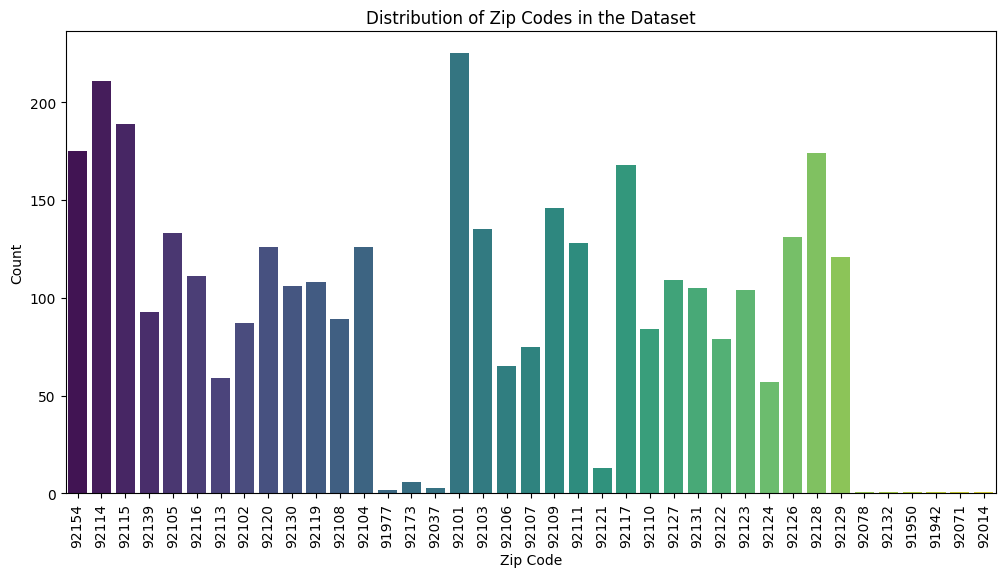

In [19]:
# view distribution of zipcodes
plt.figure(figsize=(12, 6))
fig1 = sns.countplot(data=sd_small, x='zip_code', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Distribution of Zip Codes in the Dataset')

fig1 = plt.gcf()
plt.show()

When analyzing the distribution of zip codes in our dataset, we observed that certain zip codes have significantly more listings than others. This suggests that location plays a crucial role in housing availability and potentially influences both price and desirability. Areas with a higher concentration of listings may indicate popular or high-demand neighborhoods, while those with fewer listings could reflect limited housing supply or less sought-after locations.

C:\Users\katie\AppData\Local\Temp\ipykernel_13132\1279543873.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig4 = sns.histplot(data=sd_small, x='zip_code', y='price_norm', bins=30, kde=True, palette='viridis')


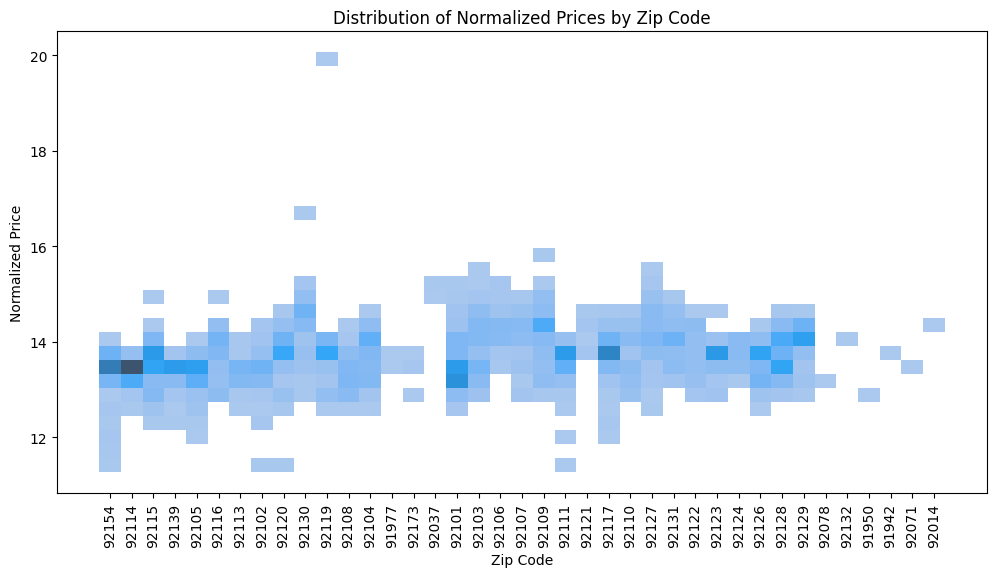

In [20]:
plt.figure(figsize=(12, 6))
fig4 = sns.histplot(data=sd_small, x='zip_code', y='price_norm', bins=30, kde=True, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Zip Code')
plt.ylabel('Normalized Price')
plt.title('Distribution of Normalized Prices by Zip Code')

fig4 = plt.gcf()
plt.show()

C:\Users\katie\AppData\Local\Temp\ipykernel_13132\2312610609.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig2 = sns.histplot(data=sd_small, x='bed', bins=30, kde=True, palette='viridis')


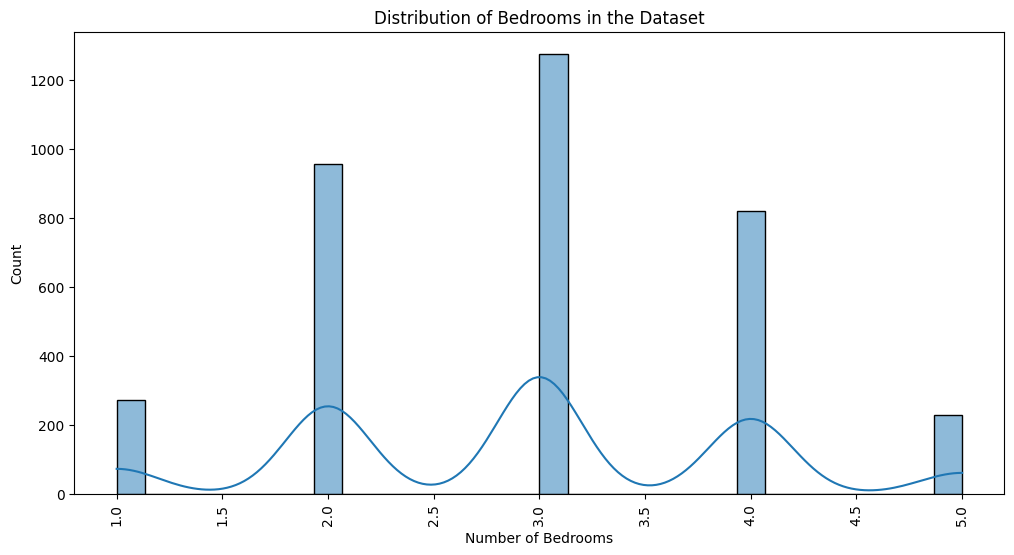

In [21]:
plt.figure(figsize=(12, 6))
fig2 = sns.histplot(data=sd_small, x='bed', bins=30, kde=True, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Bedrooms in the Dataset')

fig2 = plt.gcf()
plt.show()

This visualization represents the distribution of the number of bedrooms in properties, providing insight into common housing configurations in the market.

C:\Users\katie\AppData\Local\Temp\ipykernel_13132\2059178576.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig3 = sns.scatterplot(data=sd_small, x='bed', y='price_norm', palette='viridis')


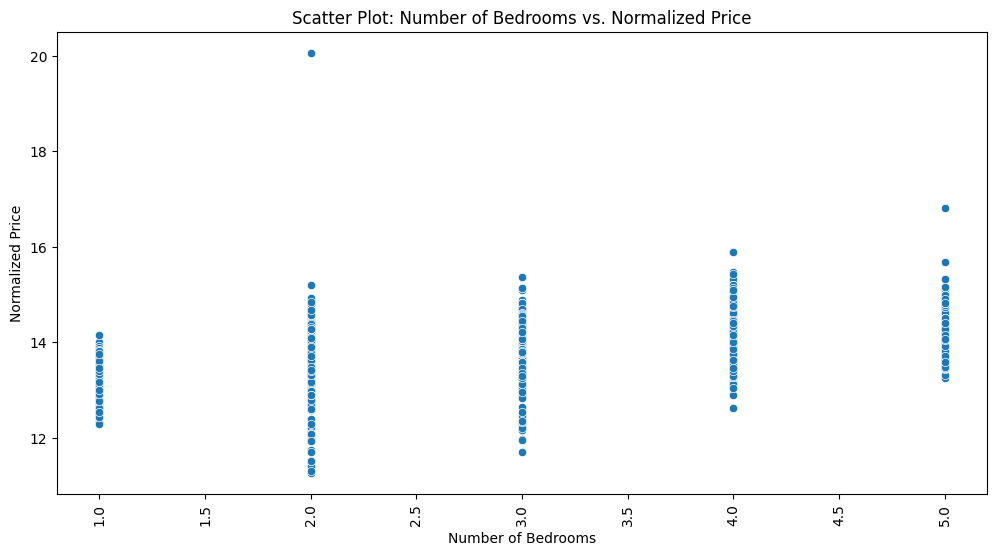

In [22]:
plt.figure(figsize=(12, 6))
fig3 = sns.scatterplot(data=sd_small, x='bed', y='price_norm', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Normalized Price')
plt.title('Scatter Plot: Number of Bedrooms vs. Normalized Price')

fig3 = plt.gcf()
plt.show()

In [23]:
sd_small[sd_small['bed'] == 2].sort_values('price', ascending=False).iloc[0]

price         515000000.0
bed                   2.0
bath                  2.0
acre_lot             2.59
city            San Diego
state          California
zip_code            92119
house_size         1048.0
price_norm      20.059677
Name: 582, dtype: object

Here we see a outlier in price. There is a property with 2 bedrooms that has a significantly higher price. Let's see if other properties in that zip code has a high price.

In [24]:
sd_small[sd_small['zip_code'] == '92119']

,price,bed,bath,acre_lot,city,state,zip_code,house_size,price_norm
108,1049000.0,3.0,3.0,0.33,San Diego,California,92119,1855.0,13.863348
127,900000.0,3.0,2.0,0.14,San Diego,California,92119,1623.0,13.710150
187,999000.0,3.0,2.0,0.21,San Diego,California,92119,1530.0,13.814510
196,860000.0,3.0,2.0,0.13,San Diego,California,92119,1485.0,13.664688
223,1049000.0,4.0,3.0,0.14,San Diego,California,92119,2112.0,13.863348
...,...,...,...,...,...,...,...,...,...
3378,999900.0,3.0,2.0,0.18,San Diego,California,92119,1814.0,13.815411
3388,900000.0,3.0,2.0,0.18,San Diego,California,92119,1778.0,13.710150
3471,1275000.0,4.0,3.0,0.29,San Diego,California,92119,2463.0,14.058457
3542,1150000.0,3.0,3.0,0.15,San Diego,California,92119,1633.0,13.955273


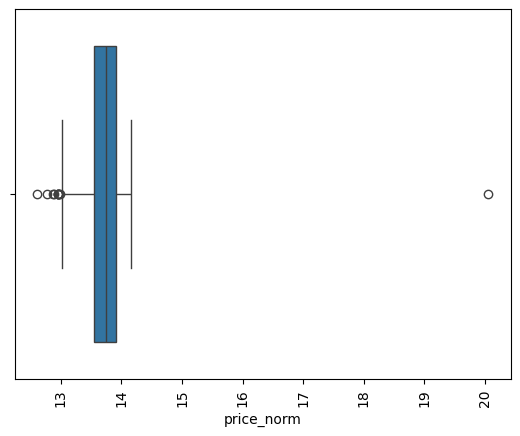

In [25]:
# view distribution of zipcode = 92119
fig1 = sns.boxplot(sd_small[sd_small['zip_code'] == '92119'], x='price_norm')
plt.xticks(rotation=90)

fig4 = plt.gcf()

Upon reviewing the cleaned dataset, it became evident that most properties were not concentrated around a single price point, indicating a wide variance in housing prices. This suggests that multiple factors, such as location, property size, and number of bedrooms, likely play a role in determining housing costs. Given this complexity, the next step was to apply machine learning algorithms to quantify the significance of these attributes in predicting house prices.

## Attribute Correlation with Machine Learning

To better understand how different property attributes influence housing prices, we applied machine learning models to analyze their significance. By leveraging regression techniques, we quantified the impact of variables such as the number of bedrooms, bathrooms, lot size, and location on home prices in San Diego.

Before training the model, we performed data preprocessing, including handling missing values, normalizing numerical features, and encoding categorical variables like zip codes. This ensured that the model could learn patterns effectively without biases from inconsistencies in the dataset.

Once the data was prepared, we trained a regression model to predict home prices based on the available features. The results provided insights into which attributes had the strongest correlation with price. For instance, we expected home size and location to be key determinants, but this analysis allowed us to confirm these assumptions and explore additional influential factors.

The following sections will present our model's findings, including feature importance scores and visualizations that highlight how different attributes contribute to housing prices in San Diego.

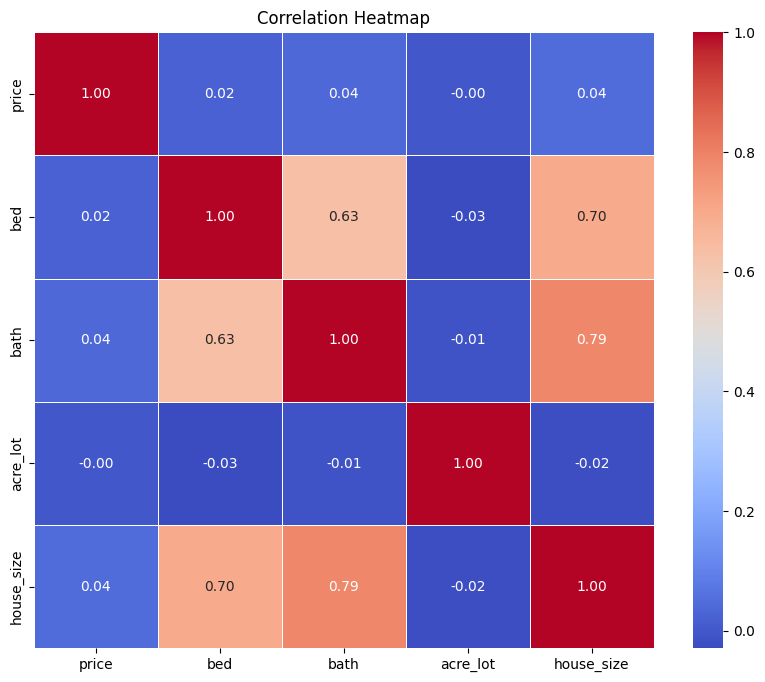

In [26]:
corr_matrix = sd_small[['price', 'bed', 'bath', 'acre_lot', 'house_size']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap reveals that house size has a moderate correlation with price, while also showing a strong correlation with bedroom and bathroom count. This suggests that larger homes generally have more bedrooms and bathrooms, making these features interrelated (potential multicollinearity). However, lot size does not show a strong correlation with any of these factors, indicating that the amount of land a property sits on may not significantly influence home price in the same way as interior features.

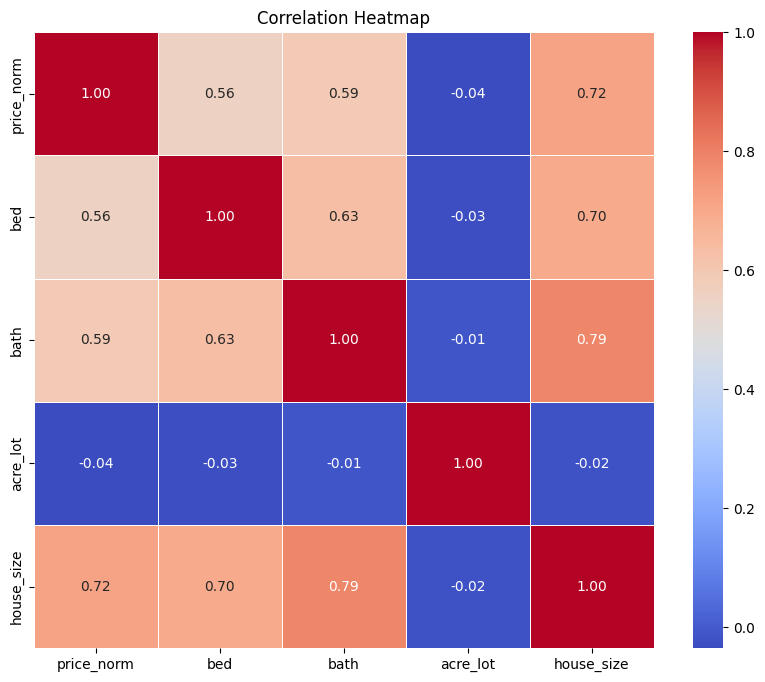

In [27]:
corr_matrix_norm = sd_small[['price_norm', 'bed', 'bath', 'acre_lot', 'house_size']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_norm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

When analyzing the correlation using normalized price values, we observe that the trends identified in the original price data become more pronounced, highlighting stronger relationships between variables.

To account for zip codes, which are non-ordinal categorical variables, we apply OneHotEncoding. This ensures that each zip code is represented as a separate feature, preventing the model from incorrectly assuming a numerical relationship between them.

In [28]:
# create encoder
encoder = OneHotEncoder(categories=[sd_small['zip_code'].unique()], handle_unknown='ignore')

In [29]:
# encode zip 
zip_ohe = pd.DataFrame(encoder.fit_transform(sd_small[['zip_code']]).toarray(), columns=[str(i) for i in range(39)])

We concatenate the encoded zip with the rest of the dataset.

In [30]:
# reset index to avoid conflicts 
sd_small = sd_small.reset_index(drop=True)
zip_ohe = zip_ohe.reset_index(drop=True)

# Now concatenate safely
df_combined = pd.concat([sd_small, zip_ohe], axis=1)

In [31]:
# view dataset 
df_combined

,price,bed,bath,acre_lot,city,state,zip_code,house_size,price_norm,0,...,29,30,31,32,33,34,35,36,37,38
0,250000.0,3.0,2.0,13.95,San Diego,California,92154,1101.0,12.429216,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,399000.0,4.0,2.0,0.20,San Diego,California,92114,1120.0,12.896717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,678888.0,3.0,2.0,0.11,San Diego,California,92114,2042.0,13.428211,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1199900.0,4.0,3.0,0.14,San Diego,California,92115,2160.0,13.997749,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,725000.0,3.0,2.0,0.11,San Diego,California,92114,1128.0,13.493927,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,695000.0,1.0,2.0,0.69,San Diego,California,92101,1111.0,13.451667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3545,675000.0,2.0,2.0,0.48,San Diego,California,92103,1106.0,13.422468,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3546,975000.0,3.0,3.0,4.69,San Diego,California,92128,2312.0,13.790193,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3547,2700000.0,5.0,3.0,0.29,San Diego,California,92103,3373.0,14.808762,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# extract normalized prices for training
price_norm = df_combined['price_norm']

We scale the data with MinMaxScaler to reduce the range of values and improve model performance.

In [33]:
# scale data to improve training performance 
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_combined.drop(columns=['price', 'city','state', 'price_norm', 'zip_code']))

In [34]:
# preview scaled data 
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.50,0.25,0.000139,0.118281,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.75,0.25,0.000002,0.121126,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.25,0.000001,0.259171,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.75,0.50,0.000001,0.276838,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.50,0.25,0.000001,0.122324,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,0.00,0.25,0.000007,0.119778,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3545,0.25,0.25,0.000005,0.119030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3546,0.50,0.50,0.000047,0.299596,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3547,1.00,0.50,0.000003,0.458452,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We use train_test_split to create our training and test sets.

In [35]:
# create train and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_scaled, price_norm, test_size=0.2, random_state=42)

## Applying Ordinary Least Squares (OLS) Regression to Understand Housing Price Determinants

To further investigate the relationship between housing attributes and price, we applied Ordinary Least Squares (OLS) regression. OLS helps quantify the impact of different factors, such as house size, number of bedrooms, number of bathrooms, and lot size, on home prices while controlling for potential multicollinearity.

OLS Bedroom

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.420
Date:                Wed, 19 Mar 2025   Prob (F-statistic):              0.233
Time:                        16:11:58   Log-Likelihood:                -61725.
No. Observations:                3549   AIC:                         1.235e+05
Df Residuals:                    3547   BIC:                         1.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.554e+05   4.39e+05      1.493      0.1

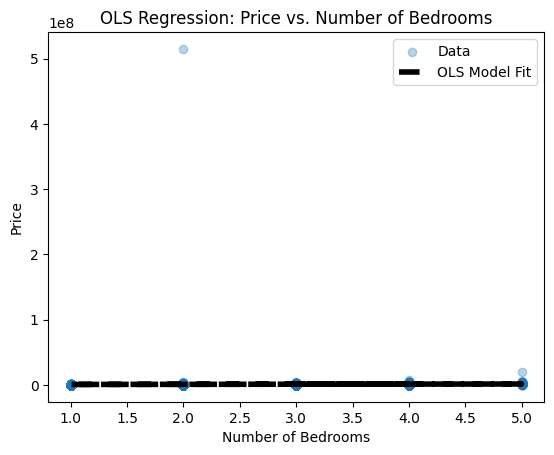

In [36]:
# Load the cleaned dataset
sd_properties = pd.read_csv('sd_properties.csv')

# Remove large houses 
sd_small = sd_properties[(sd_properties['bed'] <= 5) & (sd_properties['bath'] <= 5)]

# Define the dependent and independent variables
X_bed = sd_small[['bed']]
y = sd_small['price']

# Add a constant to the independent variables matrix
X_bed = sm.add_constant(X_bed)

# Fit the OLS model
model_bed = sm.OLS(y, X_bed).fit()

# Print the summary of the model
print(model_bed.summary())

# Plot the data and the regression line
plt.scatter(sd_small['bed'], sd_small['price'], alpha=0.3, label='Data')
plt.plot(sd_small['bed'], model_bed.predict(X_bed), '--k', linewidth=4, label='OLS Model Fit')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.title('OLS Regression: Price vs. Number of Bedrooms')
plt.show()

Our OLS model returns an R^2 value of 0.000, suggesting there is nearly 0 correlation between number of bedrooms and price. This does not match what we expected from our EDA.

OLS House Size

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.660
Date:                Wed, 19 Mar 2025   Prob (F-statistic):            0.00990
Time:                        16:11:58   Log-Likelihood:                -61722.
No. Observations:                3549   AIC:                         1.234e+05
Df Residuals:                    3547   BIC:                         1.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.553e+05    3.4e+05      1.044      0.2

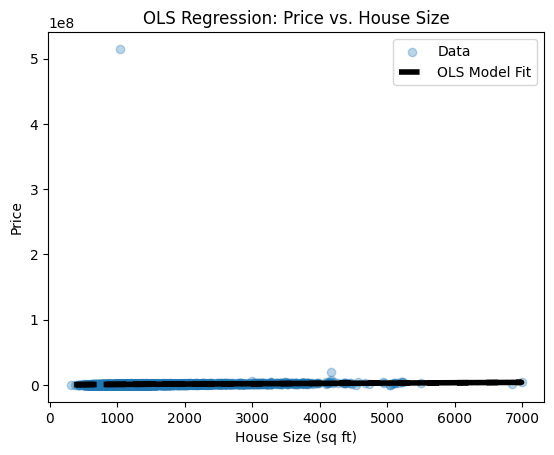

In [37]:
# Load the cleaned dataset
sd_properties = pd.read_csv('sd_properties.csv')

# Remove large houses 
sd_small = sd_properties[(sd_properties['bed'] <= 5) & (sd_properties['bath'] <= 5)]

# Define the dependent and independent variables
X_house_size = sd_small[['house_size']]
y = sd_small['price']

# Add a constant to the independent variables matrix
X_house_size = sm.add_constant(X_house_size)

# Fit the OLS model
model_house_size = sm.OLS(y, X_house_size).fit()

# Print the summary of the model
print(model_house_size.summary())

# Plot the data and the regression line
plt.scatter(sd_small['house_size'], sd_small['price'], alpha=0.3, label='Data')
plt.plot(sd_small['house_size'], model_house_size.predict(X_house_size), '--k', linewidth=4, label='OLS Model Fit')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.title('OLS Regression: Price vs. House Size')
plt.show()

Overall house size returns a slightly higher R^2 of 0.002, which is slightly better, but still not as strong of a relationship as we expected to see.

Multicollinearity among house size, bedrooms, and bathrooms indicates that these variables share overlapping information, which can distort regression estimates, and we are using the true price values which have a lot of variance. OLS may not be the best model to handle analysis of multicollinear factors.

We also see one extreme price outlier within the dataset, so we chose to remove it for further analysis.

In [38]:
def remove_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [39]:
# Remove outliers from the dataset based on the price column
cleaned_sd_properties = remove_outliers(sd_small, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1237.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          5.96e-231
Time:                        16:11:59   Log-Likelihood:                -47411.
No. Observations:                3356   AIC:                         9.483e+04
Df Residuals:                    3354   BIC:                         9.484e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.241e+05   1.73e+04     18.682      0.0

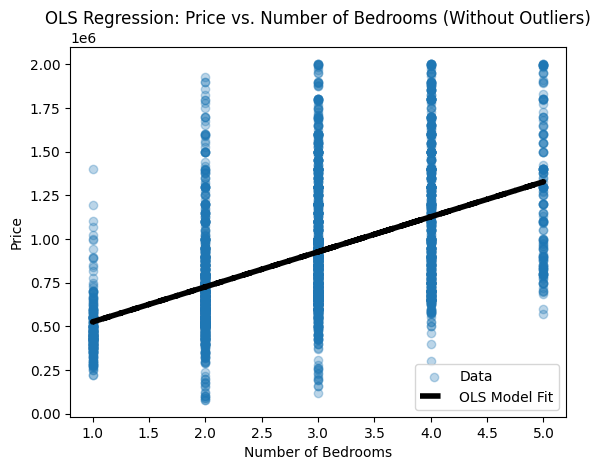

In [40]:
# OLS Regression with 'bed' as the independent variable
X_bed_clean = cleaned_sd_properties[['bed']]
y_clean = cleaned_sd_properties['price']

# Add a constant to the independent variables matrix
X_bed_clean = sm.add_constant(X_bed_clean)

# Fit the OLS model
model_bed_clean = sm.OLS(y_clean, X_bed_clean).fit()

# Print the summary of the model
print(model_bed_clean.summary())

# Plot the data and the regression line
plt.scatter(cleaned_sd_properties['bed'], cleaned_sd_properties['price'], alpha=0.3, label='Data')
plt.plot(cleaned_sd_properties['bed'], model_bed_clean.predict(X_bed_clean), '--k', linewidth=4, label='OLS Model Fit')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.title('OLS Regression: Price vs. Number of Bedrooms (Without Outliers)')
plt.show()

With the outlier removed, we get a R^2 of 0.2, suggesting a weak relationship between bedrooms and price. This reflects the correlation heatmap we produced earlier.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     2946.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:12:00   Log-Likelihood:                -46880.
No. Observations:                3356   AIC:                         9.376e+04
Df Residuals:                    3354   BIC:                         9.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.384e+05   1.31e+04     18.151      0.0

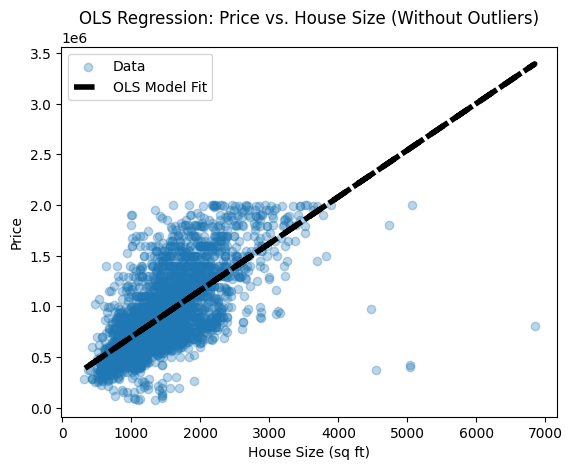

In [41]:
# OLS Regression with 'house_size' as the independent variable
X_house_size_clean = cleaned_sd_properties[['house_size']]
y_clean = cleaned_sd_properties['price']

# Add a constant to the independent variables matrix
X_house_size_clean = sm.add_constant(X_house_size_clean)

# Fit the OLS model
model_house_size_clean = sm.OLS(y_clean, X_house_size_clean).fit()

# Print the summary of the model
print(model_house_size_clean.summary())

# Plot the data and the regression line
plt.scatter(cleaned_sd_properties['house_size'], cleaned_sd_properties['price'], alpha=0.3, label='Data')
plt.plot(cleaned_sd_properties['house_size'], model_house_size_clean.predict(X_house_size_clean), '--k', linewidth=4, label='OLS Model Fit')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.title('OLS Regression: Price vs. House Size (Without Outliers)')
plt.show()

Overall house size returns a slightly higher R^2 of 0.468 which again reflects what we saw in the correlation heatmap.

Multicollinearity among house size, bedrooms, and bathrooms indicates that these variables share overlapping information, which can distort regression estimates, and we are using the true price values which have a lot of variance. OLS may not be the best model to handle analysis of multicollinear factors.

## Enhancing Predictive Accuracy with Random Forest Regression

We also test RandomForestRegressor to see if our model can improve, since RandomForest uses decision trees to increase interpretability and takes into account feature performance. For this, we use the normalized price values to improve model performance since our data contains extremely large values.

In [42]:
# initialize regressor 
rfregressor = RandomForestRegressor()

In [43]:
# fit the regressor
rfregressor.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
# predict regressor 
y_pred = rfregressor.predict(X_test)

We convert the price back to the true value for a point of comparison.

In [45]:
# revert normalized prices to true values 
y_test_org = np.exp(y_test)
y_pred_org = np.exp(y_pred)

In [46]:
# check root mean squared error 
print(root_mean_squared_error(y_test, y_pred))
print(root_mean_squared_error(y_test_org, y_pred_org))
# check percent root mean squared error 
print(np.sqrt(np.mean(np.square((y_test_org - y_pred_org) / y_test_org))))
# check R^2 score of regression 
print(rfregressor.score(X_test, y_test))

0.2821927922579978
794279.8781903086
0.4256672899214395
0.720218883825958


We see that our model predicts within 40% of the true price and has an R^2 score of 0.733. The RandomForest regression suggests that our housing features are moderately correlated with price.

We also test StandardScaler to see if a different method might improve model performance.

In [47]:
# initialize regressor 
regressor = RandomForestRegressor()

In [48]:
# scale with StandardScaler 
st_scaler = StandardScaler()
df_st_scaled = st_scaler.fit_transform(df_combined.drop(columns=['price', 'city','state', 'price_norm']))

In [49]:
# train test split with standardized data 
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(df_st_scaled, price_norm, test_size=0.2, random_state=42)

In [50]:
# fit and predict from standardized data 
regressor.fit(X_s_train, y_s_train)
y_s_pred = regressor.predict(X_s_test)

In [51]:
# revert normalized prices to true values 
y_s_test_org = np.exp(y_s_test)
y_s_pred_org = np.exp(y_s_pred)

In [52]:
# check error 
print(root_mean_squared_error(y_s_test, y_s_pred))
print(root_mean_squared_error(y_s_test_org, y_s_pred_org))
# check percent rmse 
print(np.sqrt(np.mean(np.square((y_s_test_org - y_s_pred_org) / y_s_test_org))))
# check R^2 score of regression 
print(regressor.score(X_s_test, y_s_test))

0.2761890893798658
794185.0843024818
0.402055830043376
0.7319970336258426


We see that StandardScaler produces a similar error and R^2 value to MinMaxScaler. We decided to test our unscaled data and compare it to the scaled data.

In [53]:
price=df_combined['price']

# train test split on true values 
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(df_combined.drop(columns=['price','city','state', 'price_norm', 'zip_code']), price, test_size=0.2, random_state=42)

In [54]:
# initialize regressor 
regressor = RandomForestRegressor()
# fit regressor 
regressor.fit(X_true_train, y_true_train)
# predict price from regressor 
y_true_pred = regressor.predict(X_true_test)

In [55]:
# check error 
print(root_mean_squared_error(y_true_test, y_true_pred))
# check percent rmse 
print(np.sqrt(np.mean(np.square((y_true_test - y_true_pred) / y_true_test))))
# check R^2 score of regression 
print(regressor.score(X_true_test, y_true_test))

1206657.507904089
1.6385618787006213
-0.6722720844073109


The unscaled data performs much worse and suggests negative correlation which is not what we expect to see from the data.

We plot the predictions to try and identify why the model is off.

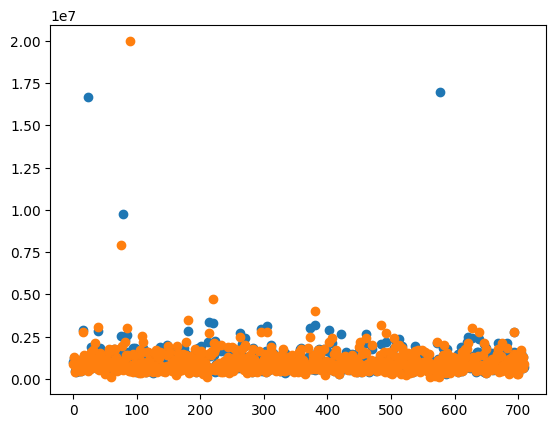

In [56]:
# plot results for unscaled data 
plt.scatter(x=range(len(y_true_pred)), y=y_true_pred)
plt.scatter(x=range(len(y_true_test)), y=y_true_test)

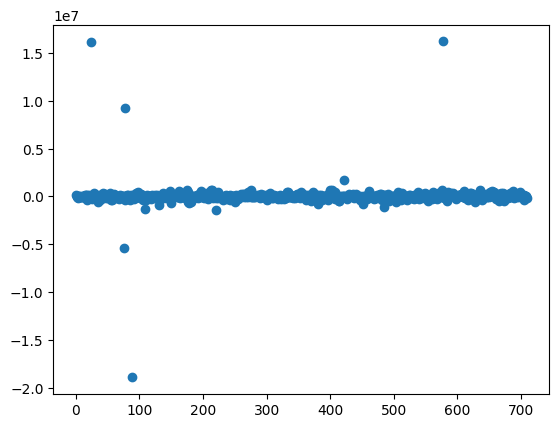

In [57]:
# plot error of true prices from MinMax scaled data
plt.scatter(x=range(len(y_true_pred)), y=(y_true_pred-y_true_test))

We observe the presence of a few extreme  outliers in the predictions.

Given that house size, number of bedrooms, and number of bathrooms are likely collinear, we apply Principal Component Analysis (PCA) to reduce dimensionality. This transformation helps condense overlapping information into fewer components, potentially improving the model’s performance by minimizing redundancy and mitigating multicollinearity.

In [58]:
pca = PCA(n_components=0.95)

df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

In [59]:
# create train and test sets 
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(df_pca, price_norm, test_size=0.2, random_state=42)

In [60]:
# initialize regressor 
pca_regressor = RandomForestRegressor()

# fit and predict from regressor 
pca_regressor.fit(X_pca_train, y_pca_train)
y_pca_pred = pca_regressor.predict(X_pca_test)

# revert normalized prices to true values 
y_pca_test_org = np.exp(y_pca_test)
y_pca_pred_org = np.exp(y_pca_pred)

# check error 
print(root_mean_squared_error(y_pca_test, y_pca_pred))
print(root_mean_squared_error(y_pca_test_org, y_pca_pred_org))
# check percent rmse 
print(np.sqrt(np.mean(np.square((y_pca_test_org - y_pca_pred_org) / y_pca_test_org))))
# check R^2 score of regression 
print(pca_regressor.score(X_pca_test, y_pca_test))

0.30004242430438127
741173.7859972899
0.4121609352740306
0.6837053133098105


We find that PCA does not improve our model compared to just using MinMaxScaler. However, observing RandomForestRegressor's performance on the scaled data suggests that it was not as distorted by multicollinearity as a simple regression model like OLS.

## Results and Discussion

We began our analysis by exploring the dataset to understand the distribution of key housing variables, identify potential outliers, and examine relationships between different attributes.

Exploratory Data Analysis (EDA)

Our initial analysis focused on understanding the distribution of key housing attributes. Home prices in San Diego are right-skewed, meaning a few very expensive properties drive up the average, while most homes fall within a lower price range. House size, bedrooms, and bathrooms tend to cluster around common values, with larger homes being less frequent. Lot sizes vary significantly, with some properties having much larger land areas than others.

Outliers in the Dataset

We identified several outliers in the dataset. Some homes are priced significantly higher than the majority, likely luxury properties in desirable neighborhoods. Similarly, some homes have extremely large house and lot sizes, which could distort analysis if not accounted for. On the other end, certain homes have unusually low prices, which may indicate data errors or incomplete records. To mitigate these issues, we applied log transformations and normalization techniques to improve model performance.


Relationship Between Variables

Our correlation analysis revealed key relationships between housing attributes. House size, number of bedrooms, and number of bathrooms are strongly correlated, meaning larger homes tend to have more bedrooms and bathrooms. Price and house size have a moderate correlation, confirming that larger homes generally cost more. However, lot size shows little correlation with price, suggesting that land area alone does not significantly impact home values. Additionally, certain zip codes have a much higher number of listings, indicating that location plays a major role in housing supply and demand.

# Ethics & Privacy

When analyzing housing data, it is important to consider ethical concerns related to privacy, bias, and fairness. Our dataset includes real estate listings with location-based attributes such as zip codes and home prices, which could raise privacy concerns if personally identifiable information (PII) were included. However, since our dataset focuses only on property details without individual ownership data, privacy risks are minimal.

A key ethical concern is bias in the data. Housing prices are influenced by historical and systemic factors, including socioeconomic disparities and redlining. If our model were used in real estate decision-making, it could unintentionally reinforce existing inequalities. To address this, we acknowledge potential biases in the dataset and interpret results with caution, ensuring that price predictions are understood in the broader social and economic context.

Additionally, we must consider the fair use of data. Our dataset comes from publicly available sources, and we adhere to terms of use by ensuring that the data is used solely for educational and research purposes. No personally sensitive information is exposed or misused in our analysis.

By addressing these ethical and privacy considerations, we aim to conduct a responsible and transparent analysis of the San Diego housing market while being mindful of its broader societal impact.


# Team Contributions

Introduction and background research was written by John Zhou

Katherine Gao
- found realtor dataset
- performed data visualizaton on realtor dataset
- performed feature engineering and RandomForest regression on realtor dataset